<a href="https://colab.research.google.com/github/r-autowired/AIMLWorks/blob/main/Notes/CV/Pi6_CV_HelmNet_Full_Code1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

## **Business Context**

Workplace safety in hazardous environments like construction sites and industrial plants is crucial to prevent accidents and injuries. One of the most important safety measures is ensuring workers wear safety helmets, which protect against head injuries from falling objects and machinery. Non-compliance with helmet regulations increases the risk of serious injuries or fatalities, making effective monitoring essential, especially in large-scale operations where manual oversight is prone to errors and inefficiency.

To overcome these challenges, SafeGuard Corp plans to develop an automated image analysis system capable of detecting whether workers are wearing safety helmets. This system will improve safety enforcement, ensuring compliance and reducing the risk of head injuries. By automating helmet monitoring, SafeGuard aims to enhance efficiency, scalability, and accuracy, ultimately fostering a safer work environment while minimizing human error in safety oversight.

## **Objective**

As a data scientist at SafeGuard Corp, you are tasked with developing an image classification model that classifies images into one of two categories:
- **With Helmet:** Workers wearing safety helmets.
- **Without Helmet:** Workers not wearing safety helmets.

## **Data Description**

The dataset consists of **631 images**, equally divided into two categories:

- **With Helmet:** 311 images showing workers wearing helmets.
- **Without Helmet:** 320 images showing workers not wearing helmets.

**Dataset Characteristics:**
- **Variations in Conditions:** Images include diverse environments such as construction sites, factories, and industrial settings, with variations in lighting, angles, and worker postures to simulate real-world conditions.
- **Worker Activities:** Workers are depicted in different actions such as standing, using tools, or moving, ensuring robust model learning for various scenarios.

# **Installing and Importing the Necessary Libraries**

In [1]:
#!pip install tensorflow[and-cuda] #numpy==1.25.2 -q

In [1]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available: 1
2.18.0


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
import os
import random
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2


# Tensorflow modules
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16                                               # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse                                                 # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

tf.config.experimental.enable_op_determinism()

# **Data Overview**


##Loading the data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/AIML_UT/Colab_Files/Pi6_CV/Pi6_Proj/images_proj.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/AIML_UT/Colab_Files/Pi6_CV/Pi6_Proj/Labels_proj.csv')

In [6]:
print(images.shape)
print(labels.shape)

(631, 200, 200, 3)
(631, 1)


####Observation
- Total of 631 images of which 320 with no Helmet

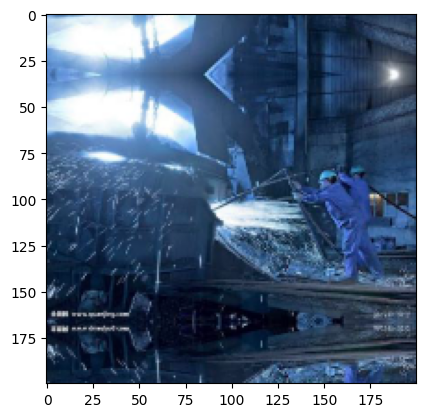

In [7]:
plt.imshow(images[5]);

####Observation
- Image displayed is of Blue Color and need to convert to RGB or Grayscale

# **Exploratory Data Analysis**

###Plot random images from each of the classes and print their corresponding labels.

In [9]:
categories=np.unique(labels)
print(categories  )
# Create a dictionary to map numerical labels to categories
label_map = {0: "No Helmet", 1: "With Helmet"}
print(label_map)

[0 1]
{0: 'No Helmet', 1: 'With Helmet'}


In [10]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  #keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          # Use the label_map to get the category name
          ax.set_title(label_map[labels['Label'][random_index]])
  plt.show()

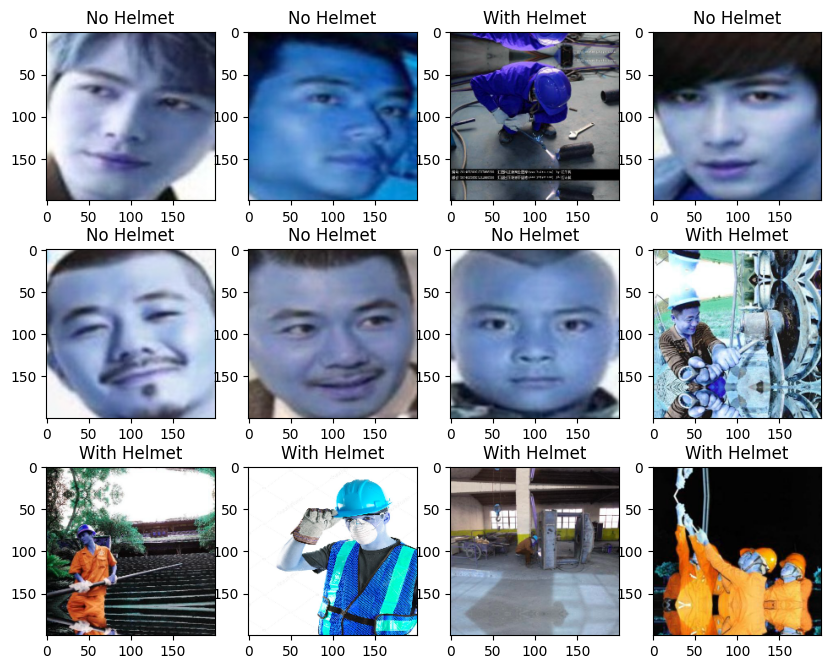

In [11]:
plot_images(images,labels)

## Checking for class imbalance


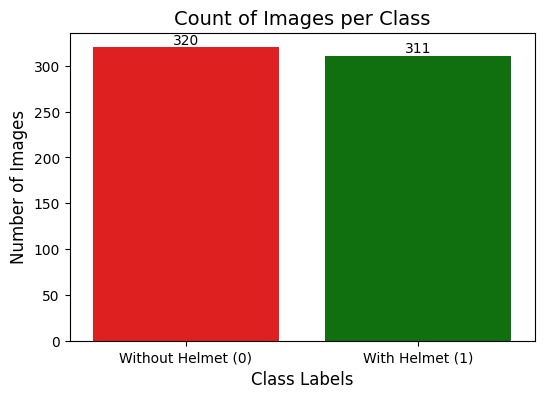

In [12]:
# Create a count plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=labels.iloc[:, 0], palette=['red', 'green'])

# Add exact counts on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, )

# Add labels
plt.xlabel("Class Labels", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Count of Images per Class", fontsize=14)
plt.xticks(ticks=[0, 1], labels=["Without Helmet (0)", "With Helmet (1)"])  # Rename x-axis labels

# Show plot
plt.show()

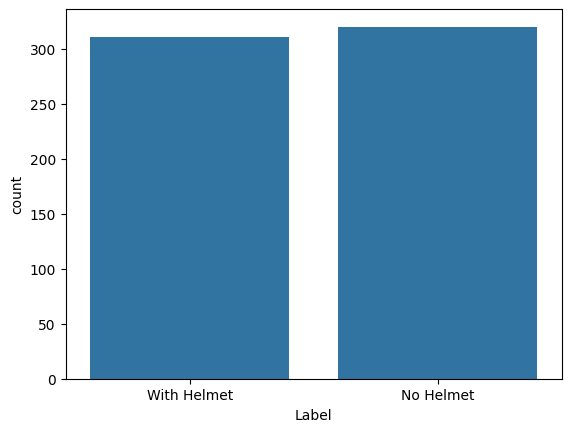

In [13]:
sns.countplot(x=labels['Label'].map(label_map))
plt.xticks(rotation='horizontal');

####Observation
- Classes are balanced well
 - with 320 images with no Helmet
 - 311 images with Helmet

# **Data Preprocessing**

## Converting images to grayscale

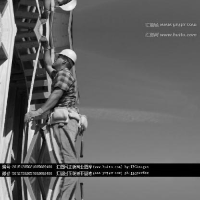

In [14]:
images_gray = []
for i in range(len(images)):
    img_gray = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    images_gray.append(img_gray)

# Display a sample grayscale image
n = 2
cv2_imshow(images_gray[n])

Shape of grayscale images: (631, 200, 200)


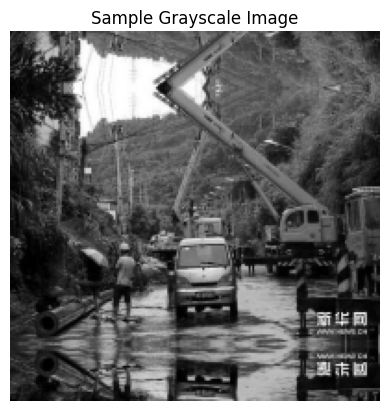

In [9]:
# Convert images to grayscale
grayscale_images = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images])

# Display the shape of the grayscale images array
print("Shape of grayscale images:", grayscale_images.shape)

# Display a sample grayscale image
plt.imshow(grayscale_images[0], cmap='gray')
plt.title("Sample Grayscale Image")
plt.axis('off')
plt.show()

####Observation
- Multiple ways showing to convert to grayscale image
- And the image size is of 200x200
- Here the function cvtColor is used to convert an image from one color space to another

### Splitting the dataset



####Resizing of image

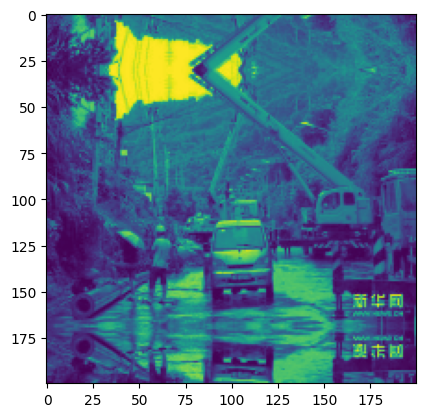

In [15]:
plt.imshow(grayscale_images[0]);

#####Observation
- Displaying image using plt.imshow for a grayscale image displays a colored image
- This is because imshow by default shows a color image and we have to specify the cmap to get the image to gray color

In [14]:
images_gray_scaled= []
height = 224 #160 #128 #64
width = 224 #160 #128 #64
dimensions = (width, height)
for i in range(len(grayscale_images)):
  images_gray_scaled.append(cv2.resize(grayscale_images[i], dimensions, interpolation=cv2.INTER_LINEAR))

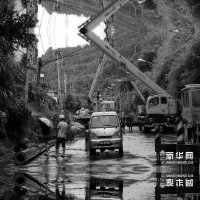

In [57]:
cv2_imshow(grayscale_images[0])

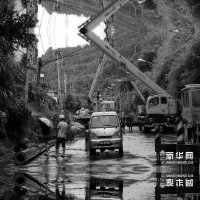

In [18]:
cv2_imshow(images_gray[0])

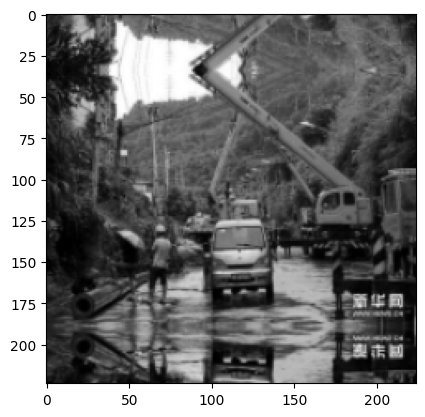

In [19]:
plt.imshow(images_gray_scaled[0], cmap='gray');

#####Observation
- Different ways of showing gray scaled image after conversion
- I tried various sizes and the best size to fit a VGG model is 224x244 and even though it increases the image size from 200x200 and computation timing also increases

In [13]:
images_RGB=[]
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images_RGB.append(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))

#####Observation
- Converting the images from BGR to RGB
- Here the function cvtColor is used to convert an image from one color space to another

array([[[19, 24,  2],
        [27, 32, 12],
        [52, 56, 41],
        ...,
        [21, 15,  6],
        [27, 19, 11],
        [27, 19, 11]],

       [[23, 28,  4],
        [52, 57, 36],
        [39, 43, 27],
        ...,
        [19, 19,  4],
        [20, 19,  5],
        [21, 20,  6]],

       [[36, 42, 14],
        [58, 64, 38],
        [25, 30,  8],
        ...,
        [30, 38, 16],
        [21, 29,  6],
        [32, 43, 19]],

       ...,

       [[21, 25,  9],
        [28, 32, 17],
        [26, 29, 17],
        ...,
        [63, 62, 49],
        [11,  9,  3],
        [ 5,  2,  4]],

       [[12, 15,  5],
        [24, 27, 19],
        [31, 34, 27],
        ...,
        [69, 67, 53],
        [10,  7,  1],
        [ 4,  1,  1]],

       [[ 3,  6,  0],
        [ 2,  4,  1],
        [ 2,  4,  2],
        ...,
        [60, 57, 43],
        [10,  7,  0],
        [ 7,  2,  2]]], dtype=uint8)
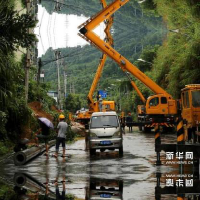

In [21]:
images_RGB[0]

In [16]:
images_color_scaled= []
height = 224 #160 #128 #64
width = 224 #160 #128 #64
dimensions = (width, height)
for i in range(len(images)):
  images_color_scaled.append(cv2.resize(images_RGB[i], dimensions, interpolation=cv2.INTER_LINEAR))

#####Observation
- Image is scaled to a dimension of 224x224
- cv2.INTER_LINER
  - The interpolation is linear. That means it uses bilinear interpolation and calculating the new pixel value based on a weighted average of the nearest pixes.

####Dataset Split
- Data set is split to Train, Test and Validation
- With 0.2 test size which splits the data and provides 80% of the data to Train data  and the remaining is equally split between test and validation as see below in the Shapes

In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(np.array(images_color_scaled),labels , test_size=0.2, random_state=42,stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp , test_size=0.5, random_state=42,stratify=y_temp)

In [18]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(504, 224, 224, 3) (504, 1)
(63, 224, 224, 3) (63, 1)
(64, 224, 224, 3) (64, 1)


In [19]:
y_train.head()

Label
83       1
202      1
176      1
404      0
427      0

#####Observation
No Encoding required as this is a binary classification problem

### Data Normalization

array([[[ 92,  91,  97],
        [ 89,  88,  94],
        [ 63,  63,  68],
        ...,
        [221, 219, 207],
        [227, 226, 214],
        [239, 239, 225]],

       [[ 99,  97, 104],
        [ 90,  89,  95],
        [ 62,  61,  66],
        ...,
        [103,  95,  85],
        [107,  99,  88],
        [119, 111, 101]],

       [[ 96,  96, 101],
        [ 91,  91,  96],
        [ 62,  61,  66],
        ...,
        [ 67,  55,  45],
        [ 69,  56,  47],
        [ 72,  59,  50]],

       ...,

       [[113, 113, 108],
        [ 73,  73,  68],
        [ 84,  83,  79],
        ...,
        [ 61,  56,  50],
        [ 66,  60,  50],
        [ 73,  68,  54]],

       [[ 92,  91,  87],
        [ 68,  68,  63],
        [ 88,  87,  83],
        ...,
        [ 58,  51,  46],
        [ 67,  59,  49],
        [ 87,  79,  66]],

       [[117, 116, 112],
        [ 77,  76,  72],
        [101, 100,  96],
        ...,
        [ 59,  49,  45],
        [ 69,  59,  50],
        [ 95,  85,  73]]], dtype=uint8)
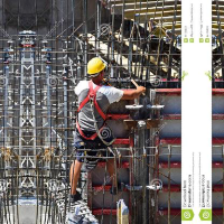

In [20]:
X_train[0]

In [30]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0


####Observation
- The image pixel values are divided by 255 is common data normalization process in image processing and deep learning
- Image pixel values range from 0 to 255 and dividing
- Dividing by 255 the image pixel values are ranged between 0.0 to 1.0

# **Model Building**

##Model Evaluation Criterion

## Utility Functions

In [22]:
metric = keras.metrics.Recall()

In [21]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()
tf.keras.backend.clear_session()

In [23]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [24]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)


    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},index=[0],)

    return df_perf

In [25]:
def plot_confusion_matrix(model,predictors,target,ml=False):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    ml: To specify if the model used is an sklearn ML model or not (True means ML model)
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target,pred)
    f, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

In [26]:
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
def build_model(model, optimizer, predictor_train, target_train ):
  """
  Function to build model and charts as well as to predict

  model : model is a sequential defined model for neural networks
  optimizer: specified optimizer for the model [sgd / adam]
  predictor_train: X_train variable (X_train_smote)
  target_train: y_train variable (y_train_smote)
  """

  # clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
  tf.keras.backend.clear_session()
  model.summary()
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric]) # Setting binary entropy as the loss function

  early_stopping = EarlyStopping(
    monitor='val_recall',
    patience=35,          # Number of epochs with no improvement to wait before stopping
    restore_best_weights=True # Restore the best weights found during training
  )

  start = time.time()
  history = model.fit(
    predictor_train, target_train,
    batch_size=128,
    validation_data=(X_val,y_val),
    epochs=200,
    verbose=0,
    callbacks=[early_stopping]
  )
  end=time.time()
  print('Total time taken for the model to run  ==> ', end-start , " secs")
  plot(history,'loss') # Plotting loss graph
  plot(history,'recall') # Plotting recall graph
  #Predicting the results using best as a threshold
  y_train_pred = model.predict(predictor_train)
  y_train_pred = (y_train_pred > 0.5)
  y_train_pred
  #Predicting the results using best as a threshold
  y_val_pred = model.predict(X_val)
  y_val_pred = (y_val_pred > 0.5)
  y_val_pred
  return history

##Convolutional Model
- Following CNN models are built from the scratch
- Multiple Feature Extraction and Predication Layers have been used to predict the best model with CNN
- Also used both  RGB and GRAY scaled images for prediction
- Also used various optimizers with 0.001 learning rate (lr)
  - Adam
  - SGD
- As the objective is to find Helmet or With-No Helmet, this classifies the problem to BINARY
- Used common Batch size of 128 and Epochs = 50
  - Epochs --> represent one complete pass through of the entire training dataset. And during this process the model sees every training example at least once. As we have 50 epochs - the entire images dataset is passed 50 times in batches to determine how many times the model revists the entrie dataset to learn pattern and refine its parameters. More the value of epochs will make the model learn the pattern throughtly and overfitting.
  - Batch Size --> defines the number of training samples processed in a neural network before the model updates the parameters (weights and biases) within each epochs.
  - Total number of iteration within an epochs is dividing the total number of training samples by batch size

- Metrics
 - There are four metrics that are used to predict the model in our training example project
   - Accuracy (Correct Predictions / Total Predictions)
     - When the value of the prediction is high, this tells the models accuracy and it is always useful in highly balanced dataset
  - Precision
    - This measures the accuracy of the positive prediction
    - In our example we will have without helmet as the positive class
  - Recall
    -  This measures the ability of the model to find all positive instances
    - So to find the number of images with no helmet is the primary task of this metric - which is crucial
    - A high recall for without helmet class means the model is good at identifying most of the instances
    - **A False Negative in this case means the system failed to detect a worker who was not wearing a helmet. This is a dangerous outcome. Therefore, a high Recall for the "Without Helmet" class is extremely important.**
  - F1 Score
    - This is a balance between Precision and Recall
- Recall is Crucial and need a high recall

###Model 1: Simple Convolutional Neural Network (CNN)

In [31]:
cnn_model_1 = Sequential()
cnn_model_1.add(Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3), padding = 'same'))
cnn_model_1.add(MaxPooling2D(2,2))
cnn_model_1.add(BatchNormalization())
cnn_model_1.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
cnn_model_1.add(MaxPooling2D(2,2))
cnn_model_1.add(BatchNormalization())
cnn_model_1.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
cnn_model_1.add(MaxPooling2D(2,2))
cnn_model_1.add(Conv2D(16, (3,3), activation='relu', padding = 'same'))   ############ ============> Until this line the model is performing Feature Extraction
cnn_model_1.add(Flatten())                                ######## ====================> Important step to flatten after Feature Extraction and before Prediction
cnn_model_1.add(Dense(64, activation='relu'))
cnn_model_1.add(Dropout(0.25))
cnn_model_1.add(Dense(32, activation='relu'))
cnn_model_1.add(Dense(1, activation='sigmoid'))
###
optimizer_1 = Adam()
#build_model(cnn_model_1, optimizer_1, X_train_normalized, y_train)
cnn_model_1.compile(loss="binary_crossentropy", optimizer=optimizer_1, metrics = [metric])
cnn_model_1.summary()
history_1 = cnn_model_1.fit(
            X_train_normalized, y_train,
            epochs=50, #Complete the code to define the number of epochs
            validation_data=(X_val_normalized,y_val),
            shuffle=True,
            batch_size=128, #Complete the code to define the batch size
            verbose=2
)
model_1_train_perf_name = model_performance_classification(cnn_model_1, X_train_normalized, y_train)
model_1_train_perf_name

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 56, 56, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 839,505 (3.20 MB)

 Trainable params: 839,313 (3.20 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/50
4/4 - 10s - 2s/step - loss: 1.1785 - recall: 0.6089 - val_loss: 0.6805 - val_recall: 1.0000
Epoch 2/50
4/4 - 6s - 2s/step - loss: 0.1738 - recall: 0.9839 - val_loss: 0.6292 - val_recall: 1.0000
Epoch 3/50
4/4 - 2s - 501ms/step - loss: 0.0231 - recall: 0.9960 - val_loss: 0.5075 - val_recall: 0.8710
Epoch 4/50
4/4 - 1s - 333ms/step - loss: 0.0290 - recall: 0.9879 - val_loss: 0.4698 - val_recall: 0.7419
Epoch 5/50
4/4 - 2s - 383ms/step - loss: 0.0233 - recall: 0.9919 - val_loss: 0.5931 - val_recall: 0.1935
Epoch 6/50
4/4 - 2s - 585ms/step - loss: 0.0178 - recall: 0.9960 - val_loss: 0.7491 - val_recall: 0.0000e+00
Epoch 7/50
4/4 - 1s - 334ms/step - loss: 0.0065 - recall: 1.0000 - val_loss: 1.0999 - val_recall: 0.0000e+00
Epoch 8/50
4/4 - 3s - 643ms/step - loss: 0.0086 - recall: 0.9960 - val_loss: 1.2217 - val_recall: 0.0000e+00
Epoch 9/50
4/4 - 3s - 637ms/step - loss: 0.0035 - recall: 1.0000 - val_loss: 1.2148 - val_recall: 0.0000e+00
Epoch 10/50
4/4 - 1s - 335ms/step - loss: 0.

Accuracy    Recall  Precision  F1 Score
0  0.507937  0.507937   0.257999  0.342189

In [139]:
# Retrieve loss values for all epochs
training_losses = history_1.history['loss']
validation_losses = history_1.history['val_loss']

sum_training_loss = sum(training_losses)
sum_validation_loss = sum(validation_losses)
mean_training_loss = sum_training_loss / len(training_losses)
mean_validation_loss = sum_validation_loss / len(validation_losses)

print("Training Losses history_1 :", mean_training_loss)
print("Validation Losses history_1 :", mean_validation_loss)

Training Losses history_1 : 0.02969862554199608
Validation Losses history_1 : 4.23543088555336


In [32]:
model_1_val_perf_name = model_performance_classification(cnn_model_1, X_val_normalized, y_val)
model_1_val_perf_name

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Accuracy    Recall  Precision  F1 Score
0  0.507937  0.507937   0.257999  0.342189

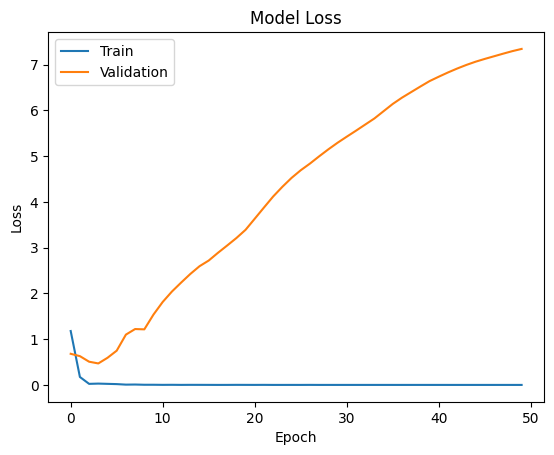

In [33]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

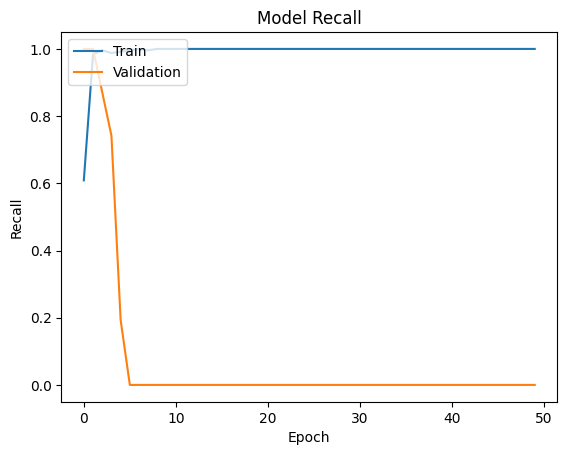

In [34]:
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


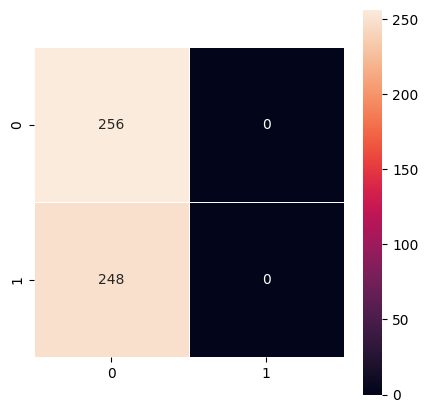

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


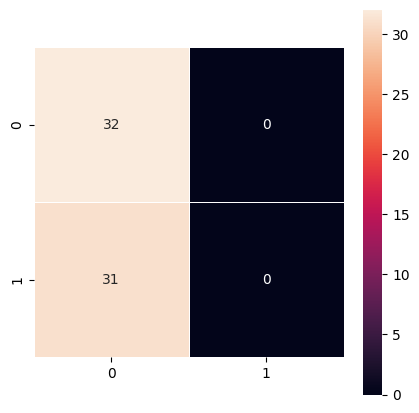

In [37]:
plot_confusion_matrix(cnn_model_1,X_train_normalized,y_train)
plot_confusion_matrix(cnn_model_1,X_val_normalized,y_val)

####Visualizing the predictions

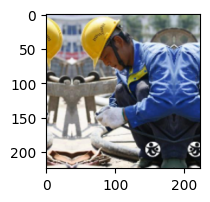

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Probability: [[2.5708189e-06]]
Predicted Label (Numeric): 0
Predicted Label (Category): No Helmet
True Label (Numeric): 1
True Label (Category): With Helmet


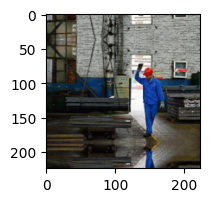

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Probability: [[6.8289496e-06]]
Predicted Label (Numeric): 0
Predicted Label (Category): No Helmet
True Label (Numeric): 1
True Label (Category): With Helmet


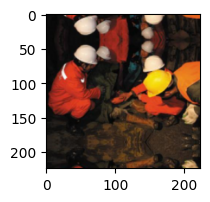

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Probability: [[7.127253e-07]]
Predicted Label (Numeric): 0
Predicted Label (Category): No Helmet
True Label (Numeric): 1
True Label (Category): With Helmet


In [56]:
# Create a dictionary to map numerical labels to categories (added for self-containment)
label_map = {0: "No Helmet", 1: "With Helmet"}

# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[3])
plt.show()
prediction_prob = cnn_model_1.predict((X_val_normalized[3].reshape(1,224,224,3)))
predicted_label_numeric = (prediction_prob > 0.5).astype(int) # Apply threshold and convert to integer (0 or 1)
predicted_label_category = label_map[predicted_label_numeric[0][0]] # Map numerical label to category name
true_label_numeric = y_val.iloc[3]['Label']
true_label_category = label_map[true_label_numeric]

print('Predicted Probability:', prediction_prob)
print('Predicted Label (Numeric):', predicted_label_numeric[0][0]) # Access the scalar value
print('Predicted Label (Category):', predicted_label_category)
print('True Label (Numeric):', true_label_numeric) # Access the scalar value
print('True Label (Category):', true_label_category)


plt.figure(figsize=(2,2))
plt.imshow(X_val[37])
plt.show()
prediction_prob = cnn_model_1.predict((X_val_normalized[37].reshape(1,224,224,3)))
predicted_label_numeric = (prediction_prob > 0.5).astype(int) # Apply threshold and convert to integer (0 or 1)
predicted_label_category = label_map[predicted_label_numeric[0][0]] # Map numerical label to category name
true_label_numeric = y_val.iloc[37]['Label']
true_label_category = label_map[true_label_numeric]

print('Predicted Probability:', prediction_prob)
print('Predicted Label (Numeric):', predicted_label_numeric[0][0]) # Access the scalar value
print('Predicted Label (Category):', predicted_label_category)
print('True Label (Numeric):', true_label_numeric) # Access the scalar value
print('True Label (Category):', true_label_category)


plt.figure(figsize=(2,2))
plt.imshow(X_val[56])
plt.show()
prediction_prob = cnn_model_1.predict((X_val_normalized[56].reshape(1,224,224,3)))
predicted_label_numeric = (prediction_prob > 0.5).astype(int) # Apply threshold and convert to integer (0 or 1)
predicted_label_category = label_map[predicted_label_numeric[0][0]] # Map numerical label to category name
true_label_numeric = y_val.iloc[56]['Label']
true_label_category = label_map[true_label_numeric]

print('Predicted Probability:', prediction_prob)
print('Predicted Label (Numeric):', predicted_label_numeric[0][0]) # Access the scalar value
print('Predicted Label (Category):', predicted_label_category)
print('True Label (Numeric):', true_label_numeric) # Access the scalar value
print('True Label (Category):', true_label_category)

####Observation
- From the above we can see images with humans wearing helmet but the predicted label is with-no helmet.
- This model does not provide high recall value and will consider other models below and see if we can improve the model predictions

###Model 2: Simple Convolutional Neural Network (CNN)

In [39]:
cnn_model_2= Sequential()
cnn_model_2.add(Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3), padding = 'same'))
cnn_model_2.add(MaxPooling2D(2,2))
cnn_model_2.add(BatchNormalization())
cnn_model_2.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
cnn_model_2.add(MaxPooling2D(2,2))
cnn_model_2.add(BatchNormalization())
cnn_model_2.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
cnn_model_2.add(MaxPooling2D(2,2))
cnn_model_2.add(Conv2D(16, (3,3), activation='relu', padding = 'same'))   ############ ============> Until this line the model is performing Feature Extraction
cnn_model_2.add(Flatten())                                ######## ====================> Important step to flatten after Feature Extraction and before Prediction
cnn_model_2.add(Dense(64, activation='relu'))
cnn_model_2.add(Dropout(0.25))
cnn_model_2.add(Dense(32, activation='relu'))
cnn_model_2.add(Dropout(0.25))
cnn_model_2.add(Dense(32, activation='relu'))
cnn_model_2.add(Dense(1, activation='sigmoid'))
###
optimizer_2 = tf.keras.optimizers.Adam(0.001)
#build_model(cnn_model_2, optimizer_2, X_train_normalized, y_train)
cnn_model_2.compile(loss="binary_crossentropy", optimizer=optimizer_2, metrics = ['accuracy', 'recall'])
cnn_model_2.summary()
history_2 = cnn_model_2.fit(
            X_train_normalized, y_train,
            epochs=50, #Complete the code to define the number of epochs
            validation_data=(X_val_normalized,y_val),
            shuffle=True,
            batch_size=128, #Complete the code to define the batch size
            verbose=0)
model_2_train_perf_name = model_performance_classification(cnn_model_2, X_train_normalized, y_train)
model_2_train_perf_name

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 112, 112, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 56, 56, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 840,561 (3.21 MB)

 Trainable params: 840,369 (3.21 MB)

 Non-trainable params: 192 (768.00 B)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


Accuracy    Recall  Precision  F1 Score
0  0.507937  0.507937   0.257999  0.342189

In [40]:
model_2_val_perf_name = model_performance_classification(cnn_model_2, X_val_normalized, y_val)
model_2_val_perf_name

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Accuracy    Recall  Precision  F1 Score
0  0.507937  0.507937   0.257999  0.342189

####Observation
- The only difference between the Model1 and Model2 (above two models) of CNN is that i have made only slight reduction in the predication layer and the results produced are similar in nature and do not want to proceed further in visualizing the predictions.
- Lets move on Model3

###Model 3: Convolutional Neural Networks

In [46]:
%%time
cnn_model_3= Sequential()
cnn_model_3.add(Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3), padding = 'same'))
cnn_model_3.add(MaxPooling2D(2,2))
cnn_model_3.add(BatchNormalization())
cnn_model_3.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
cnn_model_3.add(MaxPooling2D(2,2))
cnn_model_3.add(Conv2D(16, (3,3), activation='relu', padding = 'same'))   ############ ============> Until this line the model is performing Feature Extraction
cnn_model_3.add(Flatten())                                ######## ====================> Important step to flatten after Feature Extraction and before Prediction
cnn_model_3.add(Dense(32, activation='relu'))
cnn_model_3.add(Dropout(0.25))
cnn_model_3.add(Dense(16, activation='relu'))
cnn_model_3.add(Dropout(0.25))
cnn_model_3.add(Dense(1, activation='sigmoid'))
###
optimizer_3 = tf.keras.optimizers.SGD(0.001)
#build_model(cnn_model_3, optimizer_3, X_train_normalized, y_train)
cnn_model_3.compile(loss="binary_crossentropy", optimizer=optimizer_3, metrics = ['accuracy', 'recall'])
cnn_model_3.summary()
history_3 = cnn_model_3.fit(
            X_train_normalized, y_train,
            epochs=50, #Complete the code to define the number of epochs
            validation_data=(X_val_normalized,y_val),
            shuffle=True,
            batch_size=128, #Complete the code to define the batch size
            verbose=0)
model_3_train_perf_name = model_performance_classification(cnn_model_3, X_train_normalized, y_train)
model_3_train_perf_name

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 112, 112, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 56, 56, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │     1,605,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,631,345 (6.22 MB)

 Trainable params: 1,631,217 (6.22 MB)

 Non-trainable params: 128 (512.00 B)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
CPU times: user 16.3 s, sys: 13.1 s, total: 29.4 s
Wall time: 1min 33s


Accuracy    Recall  Precision  F1 Score
0  0.940476  0.940476    0.94672  0.940208

In [140]:
# Retrieve loss values for all epochs
training_losses = history_3.history['loss']
validation_losses = history_3.history['val_loss']

sum_training_loss = sum(training_losses)
sum_validation_loss = sum(validation_losses)
mean_training_loss = sum_training_loss / len(training_losses)
mean_validation_loss = sum_validation_loss / len(validation_losses)

print("Training Losses history_3 :", mean_training_loss)
print("Validation Losses history_3 :", mean_validation_loss)

Training Losses history_3 : 0.2327425667643547
Validation Losses history_3 : 0.5773469573259353


####Observation
- Params - in a neural network these are the values that model learns during training process. These includes weights and biases in the layer.
- Total Param
  - This is the total number of weights and biases in your entire model.
  - Conv2D and Dense contribute to this count by adding layer to the model sequence.
- Training Param
  - These are the params that the training algorithm (SGD/Adam) will adjust during the backpropagation proces. The goal of training is to find the optimal vlaue for these training params
- Non-Training Param
  - These params are not updated during the standard training process

**Layers & Params**
- Conv2D Layers
  - This performs the convolution operation to extract features
  - What is **Convolution Operation** ?
    - which is a sum of the element wise products between the input and the filter.
  - **Drawbacks**
    - Convolution operation has drawbacks and in-order to overcome it has other operations like MaxPooling, Batch Normalization, Dropouts etc...
- Dense Layer
  - Performs linear transformation followed by an Activation function
- Flatten
  - After Conv2D process it is a must to **Flatten** before processing to Dense Layer

In [48]:
model_3_val_perf_name = model_performance_classification(cnn_model_3, X_val_normalized, y_val)
model_3_val_perf_name

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Accuracy    Recall  Precision  F1 Score
0  0.936508  0.936508   0.943563  0.936186

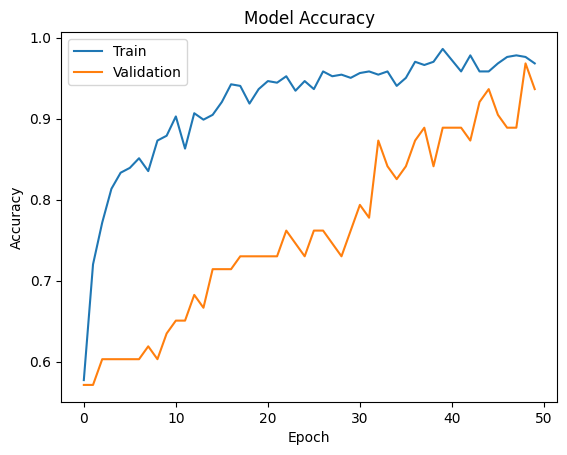

In [49]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

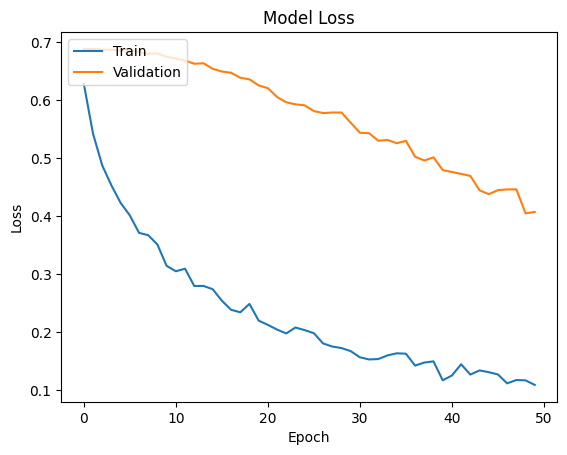

In [50]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


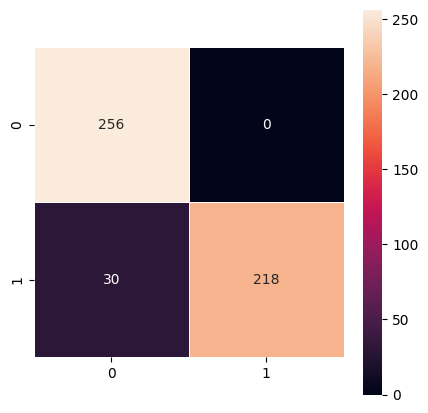

In [47]:
plot_confusion_matrix(cnn_model_3,X_train_normalized,y_train)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


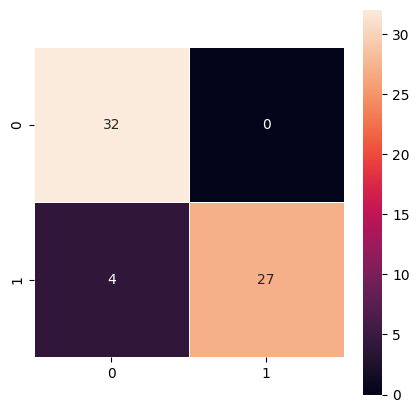

In [51]:
plot_confusion_matrix(cnn_model_3,X_val_normalized, y_val)

####Visualizing the predictions

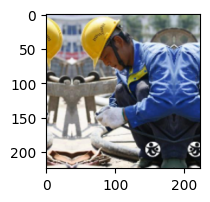

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Probability: [[0.84596306]]
Predicted Label (Numeric): 1
Predicted Label (Category): With Helmet
True Label (Numeric): 1
True Label (Category): With Helmet


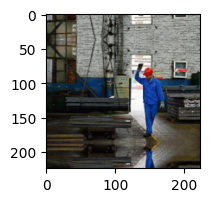

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Probability: [[0.86842185]]
Predicted Label (Numeric): 1
Predicted Label (Category): With Helmet
True Label (Numeric): 1
True Label (Category): With Helmet


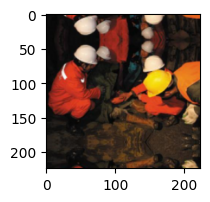

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Probability: [[0.5672682]]
Predicted Label (Numeric): 1
Predicted Label (Category): With Helmet
True Label (Numeric): 1
True Label (Category): With Helmet


In [57]:
# Create a dictionary to map numerical labels to categories (added for self-containment)
label_map = {0: "No Helmet", 1: "With Helmet"}

# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[3])
plt.show()
prediction_prob = cnn_model_3.predict((X_val_normalized[3].reshape(1,224,224,3)))
predicted_label_numeric = (prediction_prob > 0.5).astype(int) # Apply threshold and convert to integer (0 or 1)
predicted_label_category = label_map[predicted_label_numeric[0][0]] # Map numerical label to category name
true_label_numeric = y_val.iloc[3]['Label']
true_label_category = label_map[true_label_numeric]

print('Predicted Probability:', prediction_prob)
print('Predicted Label (Numeric):', predicted_label_numeric[0][0]) # Access the scalar value
print('Predicted Label (Category):', predicted_label_category)
print('True Label (Numeric):', true_label_numeric) # Access the scalar value
print('True Label (Category):', true_label_category)


plt.figure(figsize=(2,2))
plt.imshow(X_val[37])
plt.show()
prediction_prob = cnn_model_3.predict((X_val_normalized[37].reshape(1,224,224,3)))
predicted_label_numeric = (prediction_prob > 0.5).astype(int) # Apply threshold and convert to integer (0 or 1)
predicted_label_category = label_map[predicted_label_numeric[0][0]] # Map numerical label to category name
true_label_numeric = y_val.iloc[37]['Label']
true_label_category = label_map[true_label_numeric]

print('Predicted Probability:', prediction_prob)
print('Predicted Label (Numeric):', predicted_label_numeric[0][0]) # Access the scalar value
print('Predicted Label (Category):', predicted_label_category)
print('True Label (Numeric):', true_label_numeric) # Access the scalar value
print('True Label (Category):', true_label_category)


plt.figure(figsize=(2,2))
plt.imshow(X_val[56])
plt.show()
prediction_prob = cnn_model_3.predict((X_val_normalized[56].reshape(1,224,224,3)))
predicted_label_numeric = (prediction_prob > 0.5).astype(int) # Apply threshold and convert to integer (0 or 1)
predicted_label_category = label_map[predicted_label_numeric[0][0]] # Map numerical label to category name
true_label_numeric = y_val.iloc[56]['Label']
true_label_category = label_map[true_label_numeric]

print('Predicted Probability:', prediction_prob)
print('Predicted Label (Numeric):', predicted_label_numeric[0][0]) # Access the scalar value
print('Predicted Label (Category):', predicted_label_category)
print('True Label (Numeric):', true_label_numeric) # Access the scalar value
print('True Label (Category):', true_label_category)

####Observation
- As this model has high recall value and i am choosing this base model built that we built from the scratch (note: as the base model built from the scratch in model1 and model2 does not have high recall value)
- As from the above images you could see that the predicted and true label point to the same category of humans wearing helmet or not

###Model 4: Convolutional Neural Network (GrayScale Image)

In [58]:
X_train_gray, X_temp_gray, y_train_gray, y_temp_gray = train_test_split(np.array(images_gray_scaled),labels , test_size=0.2, random_state=42,stratify=labels)
X_val_gray, X_test_gray, y_val_gray, y_test_gray = train_test_split(X_temp_gray, y_temp_gray, test_size=0.5, random_state=42,stratify=y_temp_gray)

In [59]:
print(X_train_gray.shape,y_train_gray.shape)
print(X_val_gray.shape,y_val_gray.shape)
print(X_test_gray.shape,y_test_gray.shape)

(504, 224, 224) (504, 1)
(63, 224, 224) (63, 1)
(64, 224, 224) (64, 1)


In [60]:
# Normalizing the image pixels
X_train_normalized_gray = X_train_gray.astype('float32')/255.0
X_val_normalized_gray = X_val_gray.astype('float32')/255.0
X_test_normalized_gray = X_test_gray.astype('float32')/255.0

In [61]:
%%time
cnn_model_4= Sequential()
cnn_model_4.add(Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 1), padding = 'same'))
cnn_model_4.add(MaxPooling2D(2,2))
cnn_model_4.add(BatchNormalization())
cnn_model_4.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
cnn_model_4.add(MaxPooling2D(2,2))
cnn_model_4.add(Conv2D(16, (3,3), activation='relu', padding = 'same'))   ############ ============> Until this line the model is performing Feature Extraction
cnn_model_4.add(Flatten())                                ######## ====================> Important step to flatten after Feature Extraction and before Prediction
cnn_model_4.add(Dense(64, activation='relu'))
cnn_model_4.add(Dropout(0.25))
cnn_model_4.add(Dense(32, activation='relu'))
cnn_model_4.add(Dense(1, activation='sigmoid'))
###
optimizer_4 = tf.keras.optimizers.SGD(0.001)
cnn_model_4.compile(loss="binary_crossentropy", optimizer=optimizer_4, metrics = ['accuracy', 'recall'])
cnn_model_4.summary()
history_4 = cnn_model_4.fit(
            X_train_normalized_gray, y_train_gray,
            epochs=50, #Complete the code to define the number of epochs
            validation_data=(X_val_normalized_gray,y_val_gray),
            shuffle=True,
            batch_size=128, #Complete the code to define the batch size
            verbose=0)
model_4_train_perf_name = model_performance_classification(cnn_model_4, X_train_normalized_gray, y_train_gray)
model_4_train_perf_name

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 224, 224, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 112, 112, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 56, 56, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │     3,211,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,237,425 (12.35 MB)

 Trainable params: 3,237,297 (12.35 MB)

 Non-trainable params: 128 (512.00 B)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
CPU times: user 13.8 s, sys: 3.1 s, total: 16.9 s
Wall time: 1min 5s


Accuracy    Recall  Precision  F1 Score
0  0.982143  0.982143   0.982523  0.982143

In [62]:
model_4_val_perf_name = model_performance_classification(cnn_model_4, X_val_normalized_gray, y_val_gray)
model_4_val_perf_name

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Accuracy    Recall  Precision  F1 Score
0  0.984127  0.984127   0.984608  0.984119

In [141]:
# Retrieve loss values for all epochs
training_losses = history_4.history['loss']
validation_losses = history_4.history['val_loss']

sum_training_loss = sum(training_losses)
sum_validation_loss = sum(validation_losses)
mean_training_loss = sum_training_loss / len(training_losses)
mean_validation_loss = sum_validation_loss / len(validation_losses)

print("Training Losses history_4 :", mean_training_loss)
print("Validation Losses history_4 :", mean_validation_loss)

Training Losses history_4 : 0.235714430809021
Validation Losses history_4 : 0.5962186968326568


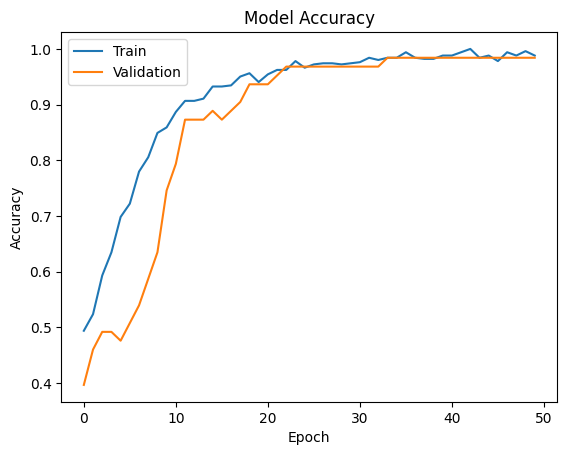

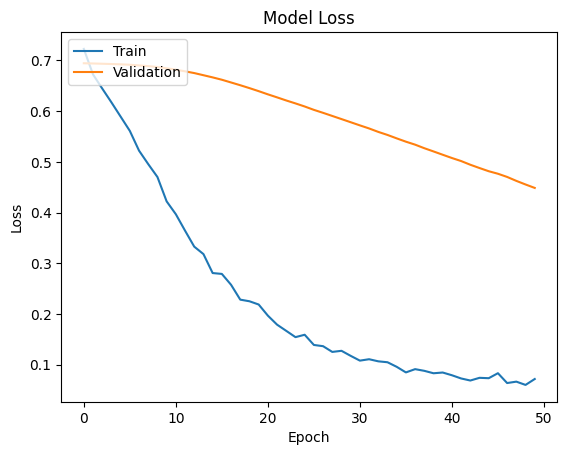

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


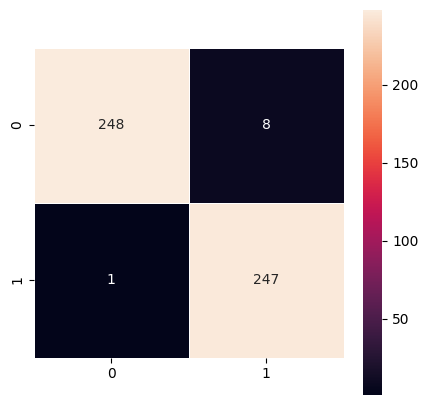

In [63]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plot_confusion_matrix(cnn_model_4,X_train_normalized_gray,y_train_gray)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


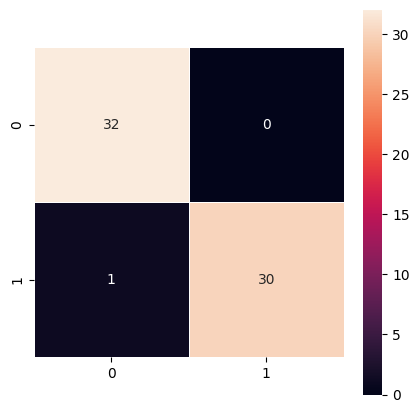

In [64]:
plot_confusion_matrix(cnn_model_4,X_val_normalized_gray,y_val_gray)

### Vizualizing the predictions

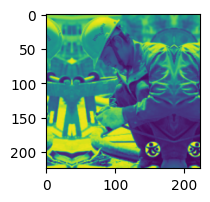

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Probability: [[0.73386407]]
Predicted Label (Numeric): 1
Predicted Label (Category): With Helmet
True Label (Numeric): 1
True Label (Category): With Helmet


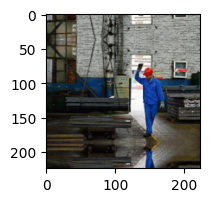

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Probability: [[0.7544756]]
Predicted Label (Numeric): 1
Predicted Label (Category): With Helmet
True Label (Numeric): 1
True Label (Category): With Helmet


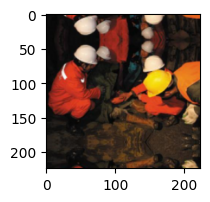

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Probability: [[0.65718347]]
Predicted Label (Numeric): 1
Predicted Label (Category): With Helmet
True Label (Numeric): 1
True Label (Category): With Helmet


In [74]:
# Create a dictionary to map numerical labels to categories (added for self-containment)
label_map = {0: "No Helmet", 1: "With Helmet"}

# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val_gray[3])
plt.show()
prediction_prob = cnn_model_4.predict((X_val_normalized_gray[3].reshape(1,224,224)))
predicted_label_numeric = (prediction_prob > 0.5).astype(int) # Apply threshold and convert to integer (0 or 1)
predicted_label_category = label_map[predicted_label_numeric[0][0]] # Map numerical label to category name
true_label_numeric = y_val_gray.iloc[3]['Label']
true_label_category = label_map[true_label_numeric]

print('Predicted Probability:', prediction_prob)
print('Predicted Label (Numeric):', predicted_label_numeric[0][0]) # Access the scalar value
print('Predicted Label (Category):', predicted_label_category)
print('True Label (Numeric):', true_label_numeric) # Access the scalar value
print('True Label (Category):', true_label_category)


plt.figure(figsize=(2,2))
plt.imshow(X_val[37])
plt.show()
prediction_prob = cnn_model_4.predict((X_val_normalized_gray[37].reshape(1,224,224)))
predicted_label_numeric = (prediction_prob > 0.5).astype(int) # Apply threshold and convert to integer (0 or 1)
predicted_label_category = label_map[predicted_label_numeric[0][0]] # Map numerical label to category name
true_label_numeric = y_val_gray.iloc[37]['Label']
true_label_category = label_map[true_label_numeric]

print('Predicted Probability:', prediction_prob)
print('Predicted Label (Numeric):', predicted_label_numeric[0][0]) # Access the scalar value
print('Predicted Label (Category):', predicted_label_category)
print('True Label (Numeric):', true_label_numeric) # Access the scalar value
print('True Label (Category):', true_label_category)


plt.figure(figsize=(2,2))
plt.imshow(X_val[56])
plt.show()
prediction_prob = cnn_model_4.predict((X_val_normalized_gray[56].reshape(1,224,224)))
predicted_label_numeric = (prediction_prob > 0.5).astype(int) # Apply threshold and convert to integer (0 or 1)
predicted_label_category = label_map[predicted_label_numeric[0][0]] # Map numerical label to category name
true_label_numeric = y_val_gray.iloc[56]['Label']
true_label_category = label_map[true_label_numeric]

print('Predicted Probability:', prediction_prob)
print('Predicted Label (Numeric):', predicted_label_numeric[0][0]) # Access the scalar value
print('Predicted Label (Category):', predicted_label_category)
print('True Label (Numeric):', true_label_numeric) # Access the scalar value
print('True Label (Category):', true_label_category)

####Observation
- This model is the same variant of model-3 just that model-4 is trained on gray scale images
- And the Recall value much better compared to Model-3


##VGG16 Models

### Model 1: (VGG-16 (Base))

In [75]:
vgg_model = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
vgg_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

###Observation
- Making all layers of VGG model as non-trainable
- Making layers of a pre-trained VGG model non-trainable, or "freezing" them, is a common practice in transfer learning. This approach leverages the knowledge acquired by the VGG model during its original training on a large dataset like ImageNet, and adapts it to a new, often smaller, dataset or task.

In [77]:
vgg_model_1 = Sequential()
# Adding the convolutional part of the VGG16 model from above
vgg_model_1.add(vgg_model)
# Flattening the output of the VGG16 model because it is from a convolutional layer
vgg_model_1.add(Flatten())
# Adding a dense output layer
vgg_model_1.add(Dense(1, activation='sigmoid'))
opt=Adam()
# Compile model
vgg_model_1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# Generating the summary of the model
vgg_model_1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │        25,089 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,739,777 (56.23 MB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [78]:
train_datagen = ImageDataGenerator()

In [79]:
X_train_normalized.shape

(504, 224, 224, 3)

In [80]:
# Epochs
epochs = 50
# Batch size
batch_size = 128

history_vgg16_model_1 = vgg_model_1.fit(train_datagen.flow(X_train_normalized,y_train,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val),
                    verbose=1)



Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7813 - loss: 0.4908 - val_accuracy: 0.9841 - val_loss: 0.1615
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.9844 - loss: 0.1693 - val_accuracy: 1.0000 - val_loss: 0.0782
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 946ms/step - accuracy: 1.0000 - loss: 0.0580 - val_accuracy: 1.0000 - val_loss: 0.0329
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 1.0000 - loss: 0.0341 - val_accuracy: 1.0000 - val_loss: 0.0311
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 0.0246 - val_accuracy: 1.0000 - val_loss: 0.0174
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 1.0000 - loss: 0.0181 - val_accuracy: 1.0000 - val_loss: 0.0127
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0040
E

In [142]:
# Retrieve loss values for all epochs
training_losses = history_vgg16_model_1.history['loss']
validation_losses = history_vgg16_model_1.history['val_loss']

sum_training_loss = sum(training_losses)
sum_validation_loss = sum(validation_losses)
mean_training_loss = sum_training_loss / len(training_losses)
mean_validation_loss = sum_validation_loss / len(validation_losses)

print("Training Losses history_vgg16_model_1 :", mean_training_loss)
print("Validation Losses history_vgg16_model_1 :", mean_validation_loss)

Training Losses history_vgg16_model_1 : 0.015182122871046887
Validation Losses history_vgg16_model_1 : 0.007823344311909751


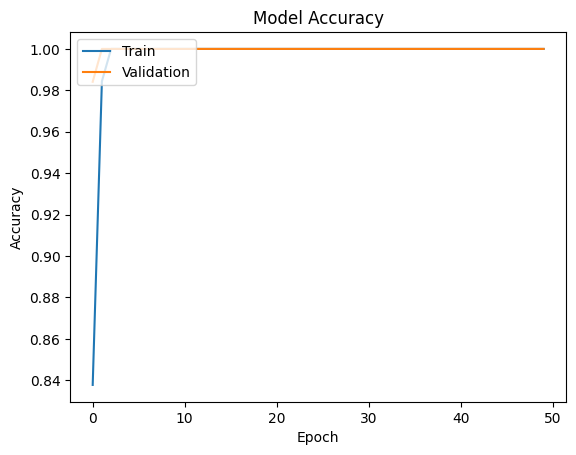

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step


Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0

In [81]:
plt.plot(history_vgg16_model_1.history['accuracy'])
plt.plot(history_vgg16_model_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
vgg_model_1_train_perf = model_performance_classification(vgg_model_1, X_train_normalized,y_train)
vgg_model_1_train_perf


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step


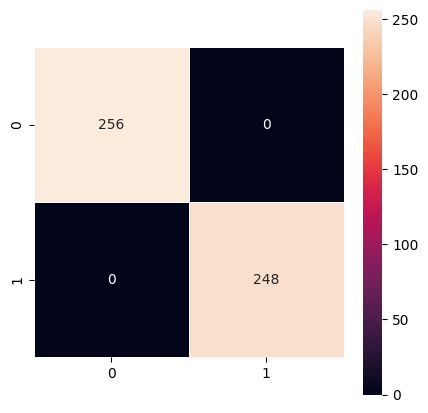

In [82]:
plot_confusion_matrix(vgg_model_1,X_train_normalized,y_train)

In [83]:
vgg_model_1_valid_perf = model_performance_classification(vgg_model_1, X_val_normalized, y_val)
vgg_model_1_valid_perf


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


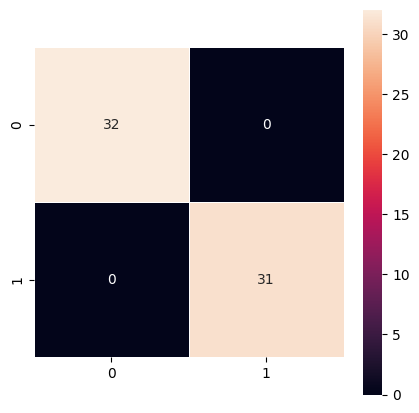

In [84]:
plot_confusion_matrix(vgg_model_1,X_val_normalized, y_val)

####Obsevation
- The model has more neurons for prediction and this is an overfitting model as the model-1 of VGG can predict the all the images with no False Positive or False Negative

### Visualizing the prediction:

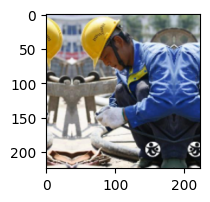

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted Probability: [[0.99993575]]
Predicted Label (Numeric): 1
Predicted Label (Category): With Helmet
True Label (Numeric): 1
True Label (Category): With Helmet


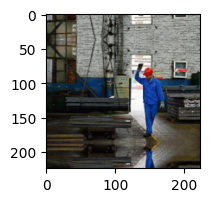

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Probability: [[0.9999956]]
Predicted Label (Numeric): 1
Predicted Label (Category): With Helmet
True Label (Numeric): 1
True Label (Category): With Helmet


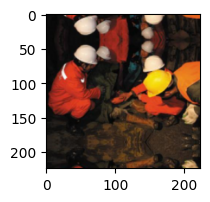

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Probability: [[0.9972397]]
Predicted Label (Numeric): 1
Predicted Label (Category): With Helmet
True Label (Numeric): 1
True Label (Category): With Helmet


In [85]:
# Create a dictionary to map numerical labels to categories (added for self-containment)
label_map = {0: "No Helmet", 1: "With Helmet"}

# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[3])
plt.show()
prediction_prob = vgg_model_1.predict((X_val_normalized[3].reshape(1,224,224,3)))
predicted_label_numeric = (prediction_prob > 0.5).astype(int) # Apply threshold and convert to integer (0 or 1)
predicted_label_category = label_map[predicted_label_numeric[0][0]] # Map numerical label to category name
true_label_numeric = y_val.iloc[3]['Label']
true_label_category = label_map[true_label_numeric]

print('Predicted Probability:', prediction_prob)
print('Predicted Label (Numeric):', predicted_label_numeric[0][0]) # Access the scalar value
print('Predicted Label (Category):', predicted_label_category)
print('True Label (Numeric):', true_label_numeric) # Access the scalar value
print('True Label (Category):', true_label_category)


plt.figure(figsize=(2,2))
plt.imshow(X_val[37])
plt.show()
prediction_prob = vgg_model_1.predict((X_val_normalized[37].reshape(1,224,224,3)))
predicted_label_numeric = (prediction_prob > 0.5).astype(int) # Apply threshold and convert to integer (0 or 1)
predicted_label_category = label_map[predicted_label_numeric[0][0]] # Map numerical label to category name
true_label_numeric = y_val.iloc[37]['Label']
true_label_category = label_map[true_label_numeric]

print('Predicted Probability:', prediction_prob)
print('Predicted Label (Numeric):', predicted_label_numeric[0][0]) # Access the scalar value
print('Predicted Label (Category):', predicted_label_category)
print('True Label (Numeric):', true_label_numeric) # Access the scalar value
print('True Label (Category):', true_label_category)


plt.figure(figsize=(2,2))
plt.imshow(X_val[56])
plt.show()
prediction_prob = vgg_model_1.predict((X_val_normalized[56].reshape(1,224,224,3)))
predicted_label_numeric = (prediction_prob > 0.5).astype(int) # Apply threshold and convert to integer (0 or 1)
predicted_label_category = label_map[predicted_label_numeric[0][0]] # Map numerical label to category name
true_label_numeric = y_val.iloc[56]['Label']
true_label_category = label_map[true_label_numeric]

print('Predicted Probability:', prediction_prob)
print('Predicted Label (Numeric):', predicted_label_numeric[0][0]) # Access the scalar value
print('Predicted Label (Category):', predicted_label_category)
print('True Label (Numeric):', true_label_numeric) # Access the scalar value
print('True Label (Category):', true_label_category)

### Model 2A: VGG-16 (Base + FFNN)

In [86]:
vgg_model_2A = Sequential()
# Adding the convolutional part of the VGG16 model from above
vgg_model_2A.add(vgg_model)
# Flattening the output of the VGG16 model because it is from a convolutional layer
vgg_model_2A.add(Flatten())
#Adding the Feed Forward neural network
vgg_model_2A.add(Dense(16,activation='tanh'))
vgg_model_2A.add(Dropout(rate=0.5))
vgg_model_2A.add(Dense(8,activation='sigmoid'))
# Adding a dense output layer
vgg_model_2A.add(Dense(1, activation='sigmoid'))
opt = Adam()
# Compile model
vgg_model_2A.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# Generating the summary of the model
vgg_model_2A.summary()
history_vgg16_model_2A = vgg_model_2A.fit(train_datagen.flow(X_train_normalized,y_train,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val),
                    verbose=1)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 16)             │       401,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,116,257 (57.66 MB)

 Trainable params: 401,569 (1.53 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6546 - loss: 0.6101 - val_accuracy: 1.0000 - val_loss: 0.3698
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 1.0000 - loss: 0.4198 - val_accuracy: 1.0000 - val_loss: 0.3640
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9827 - loss: 0.4113 - val_accuracy: 1.0000 - val_loss: 0.3460
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.9833 - loss: 0.3959 - val_accuracy: 1.0000 - val_loss: 0.3383
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9941 - loss: 0.3781 - val_accuracy: 1.0000 - val_loss: 0.3295
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.9844 - loss: 0.3697 - val_accuracy: 1.0000 - val_loss: 0.3272
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9924 - loss: 0.3667 - val_accuracy: 1.0000 - val_loss: 0.3206
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step - accuracy: 0.9922 - loss: 0.3747 - val_accuracy: 1.0000 - val_loss: 0.3184
Epoc

In [87]:
vgg_model_2A_train_perf = model_performance_classification(vgg_model_2A, X_train_normalized,y_train)
vgg_model_2A_train_perf

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step


Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0

####Observation
- As the Model-2A of VGG is overfitting trying the same by chainging some parameters in below Model-2 of VGG16(Base+FFNN)

### Model 2: (VGG-16 (Base + FFNN))

In [90]:
vgg_model_2 = Sequential()
# Adding the convolutional part of the VGG16 model from above
vgg_model_2.add(vgg_model)
# Flattening the output of the VGG16 model because it is from a convolutional layer
vgg_model_2.add(Flatten())
#Adding the Feed Forward neural network
vgg_model_2.add(Dense(128,activation='relu')) # Reduced units
vgg_model_2.add(Dropout(rate=0.5)) # Increased dropout rate
vgg_model_2.add(Dense(16,activation='relu')) # Reduced units
vgg_model_2.add(Dropout(rate=0.5)) # Added another dropout layer
# Adding a dense output layer
vgg_model_2.add(Dense(1, activation='sigmoid'))
opt = Adam()
# Compile model
vgg_model_2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# Generating the summary of the model
vgg_model_2.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,928,161 (68.39 MB)

 Trainable params: 3,213,473 (12.26 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [91]:
history_vgg16_model_2 = vgg_model_2.fit(train_datagen.flow(X_train_normalized,y_train,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val),
                    verbose=1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6269 - loss: 0.7443 - val_accuracy: 1.0000 - val_loss: 0.0455
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.7969 - loss: 0.4356 - val_accuracy: 1.0000 - val_loss: 0.0204
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8857 - loss: 0.2349 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.9297 - loss: 0.1152 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 969ms/step - accuracy: 0.9483 - loss: 0.1175 - val_accuracy: 1.0000 - val_loss: 3.2412e-04
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.9297 - loss: 0.1494 - val_accuracy: 1.0000 - val_loss: 2.8497e-04
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 959ms/step - accuracy: 0.9407 - loss: 0.1026 - val_accuracy: 1.0000 - val_loss: 3.0758e-04
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.9609 - loss: 0.1346 - val_accuracy: 1.0000 - val

In [143]:
# Retrieve loss values for all epochs
training_losses = history_vgg16_model_2.history['loss']
validation_losses = history_vgg16_model_2.history['val_loss']

sum_training_loss = sum(training_losses)
sum_validation_loss = sum(validation_losses)
mean_training_loss = sum_training_loss / len(training_losses)
mean_validation_loss = sum_validation_loss / len(validation_losses)

print("Training Losses history_vgg16_model_2 :", mean_training_loss)
print("Validation Losses history_vgg16_model_2 :", mean_validation_loss)

Training Losses history_vgg16_model_2 : 0.06067162443883717
Validation Losses history_vgg16_model_2 : 0.0014288106987213744


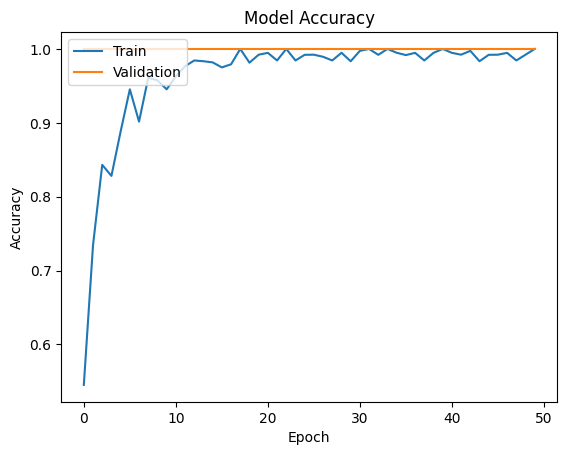

In [95]:
plt.plot(history_vgg16_model_2.history['accuracy'])
plt.plot(history_vgg16_model_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


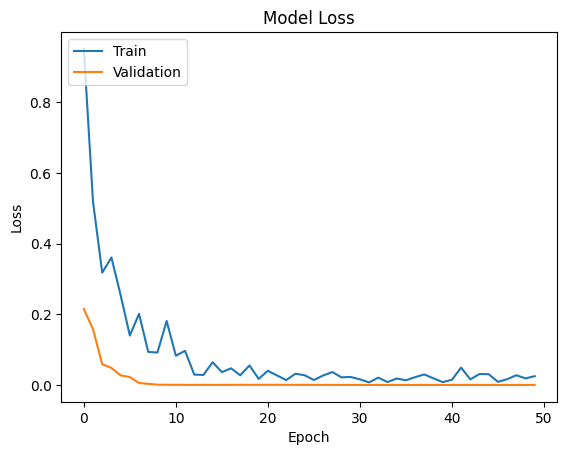

In [110]:
plt.plot(history_vgg16_model_2.history['loss'])
plt.plot(history_vgg16_model_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [111]:
vgg_model_2_train_perf = model_performance_classification(vgg_model_2, X_train_normalized,y_train)
vgg_model_2_train_perf

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step


Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step


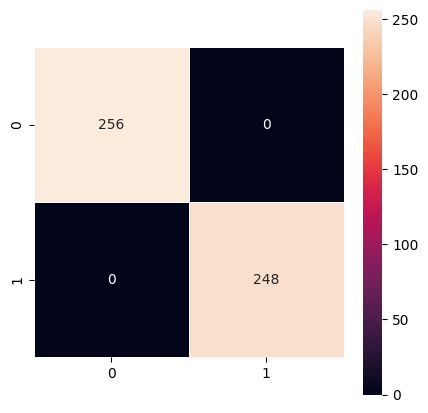

In [92]:
plot_confusion_matrix(vgg_model_2,X_train_normalized,y_train)

In [93]:
vgg_model_2_valid_perf = model_performance_classification(vgg_model_2, X_val_normalized, y_val)
vgg_model_2_valid_perf

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


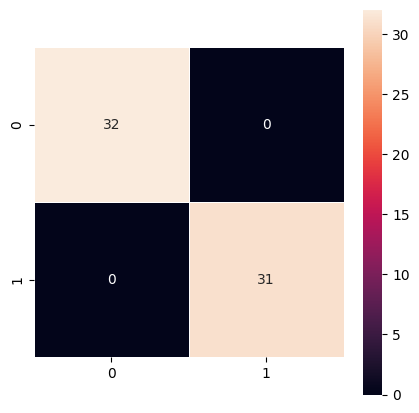

In [94]:
plot_confusion_matrix(vgg_model_2,X_val_normalized, y_val)

####Observation
- THis model-2 of VGG16 (Base+FFNN) also seems to be overfitting and able to predict all images correctly (No False Positive or False Negative)
- We will directly use the convolutional and pooling layers (VGG-16) and freeze their weights i.e. no training will be done on them.
- For classification, we will add a Flatten layer and a Feed Forward Neural Network.

#### Visualizing the predictions

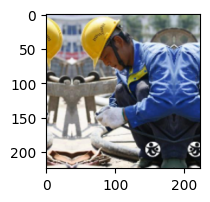

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Probability: [[1.]]
Predicted Label (Numeric): 1
Predicted Label (Category): With Helmet
True Label (Numeric): 1
True Label (Category): With Helmet


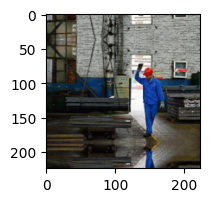

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Probability: [[1.]]
Predicted Label (Numeric): 1
Predicted Label (Category): With Helmet
True Label (Numeric): 1
True Label (Category): With Helmet


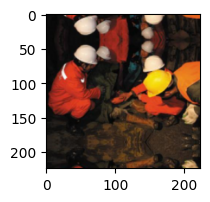

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted Probability: [[0.9999995]]
Predicted Label (Numeric): 1
Predicted Label (Category): With Helmet
True Label (Numeric): 1
True Label (Category): With Helmet


In [95]:
# Create a dictionary to map numerical labels to categories (added for self-containment)
label_map = {0: "No Helmet", 1: "With Helmet"}

# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[3])
plt.show()
prediction_prob = vgg_model_2.predict((X_val_normalized[3].reshape(1,224,224,3)))
predicted_label_numeric = (prediction_prob > 0.5).astype(int) # Apply threshold and convert to integer (0 or 1)
predicted_label_category = label_map[predicted_label_numeric[0][0]] # Map numerical label to category name
true_label_numeric = y_val.iloc[3]['Label']
true_label_category = label_map[true_label_numeric]

print('Predicted Probability:', prediction_prob)
print('Predicted Label (Numeric):', predicted_label_numeric[0][0]) # Access the scalar value
print('Predicted Label (Category):', predicted_label_category)
print('True Label (Numeric):', true_label_numeric) # Access the scalar value
print('True Label (Category):', true_label_category)


plt.figure(figsize=(2,2))
plt.imshow(X_val[37])
plt.show()
prediction_prob = vgg_model_2.predict((X_val_normalized[37].reshape(1,224,224,3)))
predicted_label_numeric = (prediction_prob > 0.5).astype(int) # Apply threshold and convert to integer (0 or 1)
predicted_label_category = label_map[predicted_label_numeric[0][0]] # Map numerical label to category name
true_label_numeric = y_val.iloc[37]['Label']
true_label_category = label_map[true_label_numeric]

print('Predicted Probability:', prediction_prob)
print('Predicted Label (Numeric):', predicted_label_numeric[0][0]) # Access the scalar value
print('Predicted Label (Category):', predicted_label_category)
print('True Label (Numeric):', true_label_numeric) # Access the scalar value
print('True Label (Category):', true_label_category)


plt.figure(figsize=(2,2))
plt.imshow(X_val[56])
plt.show()
prediction_prob = vgg_model_2.predict((X_val_normalized[56].reshape(1,224,224,3)))
predicted_label_numeric = (prediction_prob > 0.5).astype(int) # Apply threshold and convert to integer (0 or 1)
predicted_label_category = label_map[predicted_label_numeric[0][0]] # Map numerical label to category name
true_label_numeric = y_val.iloc[56]['Label']
true_label_category = label_map[true_label_numeric]

print('Predicted Probability:', prediction_prob)
print('Predicted Label (Numeric):', predicted_label_numeric[0][0]) # Access the scalar value
print('Predicted Label (Category):', predicted_label_category)
print('True Label (Numeric):', true_label_numeric) # Access the scalar value
print('True Label (Category):', true_label_category)

### Model 3: (VGG-16 (Base + FFNN + Data Augmentation)

- In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs.
- To overcome this problem, one approach we might consider is **Data Augmentation**.
- CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. - Taking this attribute into account, we can augment the images using the techniques listed below

    -  Horizontal Flip (should be set to True/False)
    -  Vertical Flip (should be set to True/False)
    -  Height Shift (should be between 0 and 1)
    -  Width Shift (should be between 0 and 1)
    -  Rotation (should be between 0 and 180)
    -  Shear (should be between 0 and 1)
    -  Zoom (should be between 0 and 1) etc.

Remember, **data augmentation should not be used in the validation/test data set**.

In [96]:
vgg_model_3 = Sequential()
# Adding the convolutional part of the VGG16 model from above
vgg_model_3.add(vgg_model)
# Flattening the output of the VGG16 model because it is from a convolutional layer
vgg_model_3.add(Flatten())
#Adding the Feed Forward neural network
vgg_model_3.add(Dense(64,activation='relu'))
vgg_model_3.add(Dropout(rate=0.4))
vgg_model_3.add(Dense(32,activation='relu'))
# Adding a dense output layer
vgg_model_3.add(Dense(1, activation='sigmoid'))
opt = Adam()
# Compile model
vgg_model_3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# Generating the summary of the model
vgg_model_3.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,322,497 (62.27 MB)

 Trainable params: 1,607,809 (6.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [98]:
# Applying data augmentation
train_datagen_2 = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest',
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.3,
                              horizontal_flip=True,
                              zoom_range=0.4
                              )

####Observation
- ImageDataGenerator class is used for Data Augmentation
 - This means that CNN has the property of Translation Invariance

In [99]:
# Epochs
epochs = 50
# Batch size
batch_size = 128

history_vgg16_model_3 = vgg_model_3.fit(train_datagen_2.flow(X_train_normalized,y_train,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=True),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val),
                    verbose=1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6794 - loss: 0.5738 - val_accuracy: 1.0000 - val_loss: 0.0228
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.9375 - loss: 0.1411 - val_accuracy: 1.0000 - val_loss: 0.0176
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9579 - loss: 0.1056 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.9844 - loss: 0.0448 - val_accuracy: 1.0000 - val_loss: 0.0125
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9840 - loss: 0.0346 - val_accuracy: 1.0000 - val_loss: 0.0063
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.9833 - loss: 0.0284 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9931 - loss: 0.0320 - val_accuracy: 1.0000 - val_loss: 9.7972e-05
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 6.3553e

####Observation
- The model is fit on the X_train only for the train_datagen_2 and not on the text or validation data set
- Shuffle is TRUE --> so that the image data gets suffled between epochs

In [144]:
# Retrieve loss values for all epochs
training_losses = history_vgg16_model_3.history['loss']
validation_losses = history_vgg16_model_3.history['val_loss']

sum_training_loss = sum(training_losses)
sum_validation_loss = sum(validation_losses)
mean_training_loss = sum_training_loss / len(training_losses)
mean_validation_loss = sum_validation_loss / len(validation_losses)

print("Training Losses history_vgg16_model_3 :", mean_training_loss)
print("Validation Losses history_vgg16_model_3 :", mean_validation_loss)

Training Losses history_vgg16_model_3 : 0.025833420712733642
Validation Losses history_vgg16_model_3 : 0.0014309326236070774


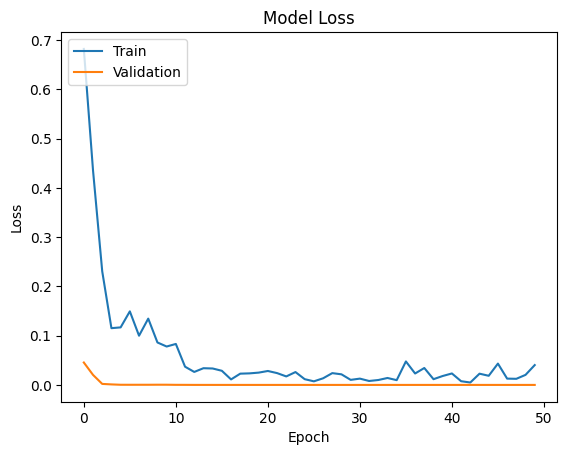

In [104]:
plt.plot(history_vgg16_model_2.history['loss'])
plt.plot(history_vgg16_model_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

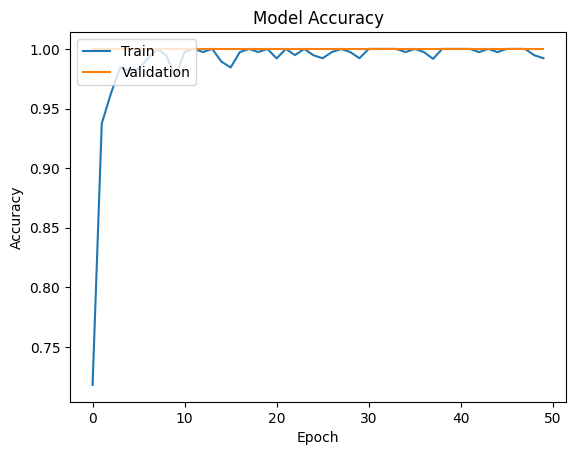

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step


Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0

In [105]:
plt.plot(history_vgg16_model_3.history['accuracy'])
plt.plot(history_vgg16_model_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
vgg_model_3_train_perf = model_performance_classification(vgg_model_3, X_train_normalized,y_train)
vgg_model_3_train_perf

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step


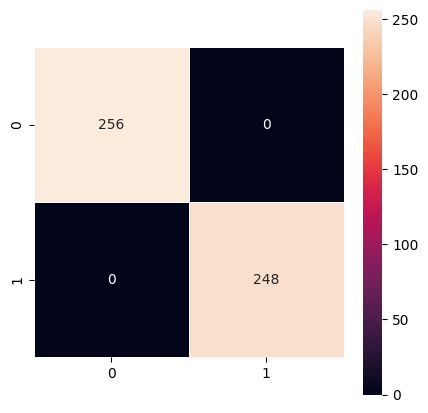

In [106]:
plot_confusion_matrix(vgg_model_3,X_train_normalized,y_train)

In [107]:
vgg_model_3_valid_perf = model_performance_classification(vgg_model_3, X_val_normalized, y_val)
vgg_model_3_valid_perf

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


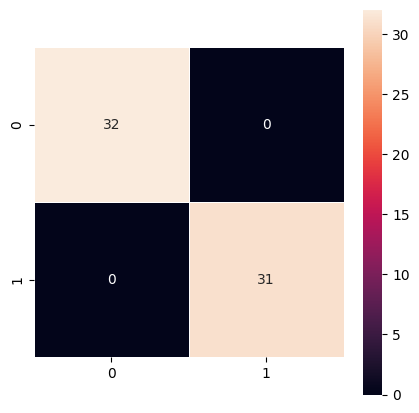

In [108]:
plot_confusion_matrix(vgg_model_3,X_val_normalized, y_val)

#### Visualizing the predictions

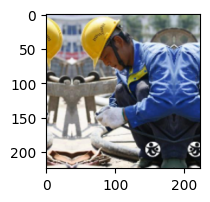

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Probability: [[1.]]
Predicted Label (Numeric): 1
Predicted Label (Category): With Helmet
True Label (Numeric): 1
True Label (Category): With Helmet


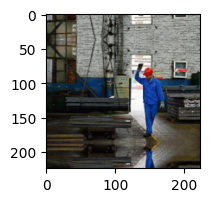

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Probability: [[1.]]
Predicted Label (Numeric): 1
Predicted Label (Category): With Helmet
True Label (Numeric): 1
True Label (Category): With Helmet


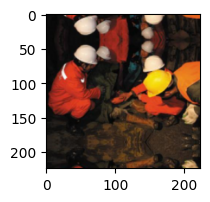

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Probability: [[1.]]
Predicted Label (Numeric): 1
Predicted Label (Category): With Helmet
True Label (Numeric): 1
True Label (Category): With Helmet


In [109]:
# Create a dictionary to map numerical labels to categories (added for self-containment)
label_map = {0: "No Helmet", 1: "With Helmet"}

# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[3])
plt.show()
prediction_prob = vgg_model_3.predict((X_val_normalized[3].reshape(1,224,224,3)))
predicted_label_numeric = (prediction_prob > 0.5).astype(int) # Apply threshold and convert to integer (0 or 1)
predicted_label_category = label_map[predicted_label_numeric[0][0]] # Map numerical label to category name
true_label_numeric = y_val.iloc[3]['Label']
true_label_category = label_map[true_label_numeric]

print('Predicted Probability:', prediction_prob)
print('Predicted Label (Numeric):', predicted_label_numeric[0][0]) # Access the scalar value
print('Predicted Label (Category):', predicted_label_category)
print('True Label (Numeric):', true_label_numeric) # Access the scalar value
print('True Label (Category):', true_label_category)


plt.figure(figsize=(2,2))
plt.imshow(X_val[37])
plt.show()
prediction_prob = vgg_model_3.predict((X_val_normalized[37].reshape(1,224,224,3)))
predicted_label_numeric = (prediction_prob > 0.5).astype(int) # Apply threshold and convert to integer (0 or 1)
predicted_label_category = label_map[predicted_label_numeric[0][0]] # Map numerical label to category name
true_label_numeric = y_val.iloc[37]['Label']
true_label_category = label_map[true_label_numeric]

print('Predicted Probability:', prediction_prob)
print('Predicted Label (Numeric):', predicted_label_numeric[0][0]) # Access the scalar value
print('Predicted Label (Category):', predicted_label_category)
print('True Label (Numeric):', true_label_numeric) # Access the scalar value
print('True Label (Category):', true_label_category)


plt.figure(figsize=(2,2))
plt.imshow(X_val[56])
plt.show()
prediction_prob = vgg_model_3.predict((X_val_normalized[56].reshape(1,224,224,3)))
predicted_label_numeric = (prediction_prob > 0.5).astype(int) # Apply threshold and convert to integer (0 or 1)
predicted_label_category = label_map[predicted_label_numeric[0][0]] # Map numerical label to category name
true_label_numeric = y_val.iloc[56]['Label']
true_label_category = label_map[true_label_numeric]

print('Predicted Probability:', prediction_prob)
print('Predicted Label (Numeric):', predicted_label_numeric[0][0]) # Access the scalar value
print('Predicted Label (Category):', predicted_label_category)
print('True Label (Numeric):', true_label_numeric) # Access the scalar value
print('True Label (Category):', true_label_category)

# **Model Performance Comparison and Final Model Selection**

In [124]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_1_train_perf_name.T,
        model_3_train_perf_name.T,
        model_4_train_perf_name.T,
        vgg_model_1_train_perf.T,
        vgg_model_2_train_perf.T,
        vgg_model_3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "CNN Model-1","CNN Model-3 ", "  CNN Model-4 Gray", "VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]
models_valid_comp_df = pd.concat(
    [
        model_1_val_perf_name.T,
        model_3_val_perf_name.T,
        model_4_val_perf_name.T,
        vgg_model_1_valid_perf.T,
        vgg_model_2_valid_perf.T,
        vgg_model_3_valid_perf.T,
    ],
    axis=1,
)
models_valid_comp_df.columns = [
 "CNN Model-1","CNN Model-3 ", " CNN Model-4 Gray" , "  VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]


In [125]:
models_train_comp_df

CNN Model-1  CNN Model-3     CNN Model-4 Gray  VGG-16 (Base)  \
Accuracy      0.507937      0.940476            0.982143            1.0   
Recall        0.507937      0.940476            0.982143            1.0   
Precision     0.257999      0.946720            0.982523            1.0   
F1 Score      0.342189      0.940208            0.982143            1.0   

           VGG-16 (Base+FFNN)  VGG-16 (Base+FFNN+Data Aug)  
Accuracy                  1.0                          1.0  
Recall                    1.0                          1.0  
Precision                 1.0                          1.0  
F1 Score                  1.0                          1.0

In [126]:
models_valid_comp_df

CNN Model-1  CNN Model-3    CNN Model-4 Gray    VGG-16 (Base)  \
Accuracy      0.507937      0.936508           0.984127              1.0   
Recall        0.507937      0.936508           0.984127              1.0   
Precision     0.257999      0.943563           0.984608              1.0   
F1 Score      0.342189      0.936186           0.984119              1.0   

           VGG-16 (Base+FFNN)  VGG-16 (Base+FFNN+Data Aug)  
Accuracy                  1.0                          1.0  
Recall                    1.0                          1.0  
Precision                 1.0                          1.0  
F1 Score                  1.0                          1.0

####Observation
- From the above all VGG models are overfitting and are able to predict images perfectly
- But, even though VGG model has multiple convolution layer and other dense layer and predicting all images perfectly, still i would like to stick with gray-scaled cnn model-4 (Gray)
- This model is developed from the scratch and provides best metrics score in all 4 categories (Accuracy, Precision, Recall, F1)

## Test Performance

In [130]:
model_4_test_perf = model_performance_classification(cnn_model_4, X_test_normalized_gray,y_test_gray)
model_4_test_perf

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step 


Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step 


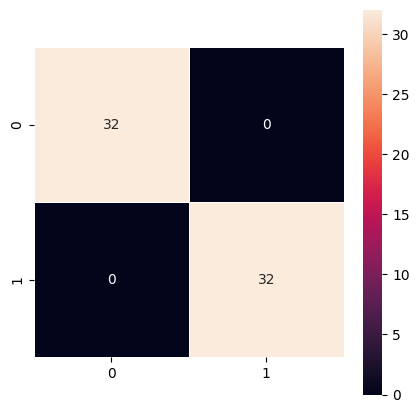

In [131]:
plot_confusion_matrix(cnn_model_4, X_test_normalized_gray,y_test_gray)

####Predicting Models Based on LOSS

From the above after finding loss and val_loss for individual model below is the final values of loss for each model

Training Losses history_1 : 0.02969862554199608
Validation Losses history_1 : 4.23543088555336

Training Losses history_3 : 0.2327425667643547
Validation Losses history_3 : 0.5773469573259353

Training Losses history_4 : 0.235714430809021
Validation Losses history_4 : 0.5962186968326568

Training Losses history_vgg16_model_1 : 0.015182122871046887
Validation Losses history_vgg16_model_1 : 0.007823344311909751

Training Losses history_vgg16_model_2 : 0.06067162443883717
Validation Losses history_vgg16_model_2 : 0.0014288106987213744

Training Losses history_vgg16_model_3 : 0.025833420712733642
Validation Losses history_vgg16_model_3 : 0.0014309326236070774

In [162]:
Training_Losses_history_1 = 0.02969862554199608
Validation_Losses_history_1 =4.23543088555336
print('MODEL-1        ==> LOSS => ', ( Validation_Losses_history_1 - Training_Losses_history_1))

Training_Losses_history_3 =0.2327425667643547
Validation_Losses_history_3 =0.5773469573259353
print('Model-3        ==> LOSS => ', Validation_Losses_history_3 - Training_Losses_history_3  )

Training_Losses_history_4 =0.235714430809021
Validation_Losses_history_4 =0.5962186968326568
print('Model-4 (Gray) ==> LOSS => ', Validation_Losses_history_4 - Training_Losses_history_4  )

Training_Losses_history_vgg16_model_1 =0.015182122871046887
Validation_Losses_history_vgg16_model_1 =0.007823344311909751
print('VGG16 Model-1  ==> LOSS => ', Validation_Losses_history_vgg16_model_1 - Training_Losses_history_vgg16_model_1  )

Training_Losses_history_vgg16_model_2 =0.06067162443883717
Validation_Losses_history_vgg16_model_2 =0.0014288106987213744
print('VGG16 Model-2  ==> LOSS => ', Validation_Losses_history_vgg16_model_2 - Training_Losses_history_vgg16_model_2  )

Training_Losses_history_vgg16_model_3 =0.025833420712733642
Validation_Losses_history_vgg16_model_3 =0.0014309326236070774
print('VGG16 Model-3  ==> LOSS => ', Validation_Losses_history_vgg16_model_3 - Training_Losses_history_vgg16_model_3  )

print('*'*100)
print('Model-1        val_loss < loss ==> ', Validation_Losses_history_1 < Training_Losses_history_1 )
print('Model-3        val_loss < loss ==> ', Validation_Losses_history_3 < Training_Losses_history_3)
print('Model-4 (Gray) val_loss < loss ==> ', Validation_Losses_history_4 < Training_Losses_history_4 )
print('VGG16 Model-1  val_loss < loss ==> ', Validation_Losses_history_vgg16_model_1 < Training_Losses_history_vgg16_model_1 )
print('VGG16 Model-2  val_loss < loss ==> ', Validation_Losses_history_vgg16_model_2 < Training_Losses_history_vgg16_model_2 )
print('VGG16 Model-3  val_loss < loss ==> ', Validation_Losses_history_vgg16_model_3 < Training_Losses_history_vgg16_model_3 )


MODEL-1        ==> LOSS =>  4.205732260011364
Model-3        ==> LOSS =>  0.34460439056158065
Model-4 (Gray) ==> LOSS =>  0.36050426602363583
VGG16 Model-1  ==> LOSS =>  -0.007358778559137136
VGG16 Model-2  ==> LOSS =>  -0.05924281374011579
VGG16 Model-3  ==> LOSS =>  -0.024402488089126564
****************************************************************************************************
Model-1        val_loss < loss ==>  False
Model-3        val_loss < loss ==>  False
Model-4 (Gray) val_loss < loss ==>  False
VGG16 Model-1  val_loss < loss ==>  True
VGG16 Model-2  val_loss < loss ==>  True
VGG16 Model-3  val_loss < loss ==>  True


####Observation
- Do use the difference (val_loss - loss) and also compare the losses (val_loss < loss)
  - A small difference does not mean good generalization
  - what matters is how small the validation loss is in absolute terms

# **Actionable Insights & Recommendations**

- VGG16 Models
  - VGG16 model is so robust to predict the images with/with-no helmets on humans
  - The reason behind that model predicts so well is that the number of images (data set) provided is way minimal
  - If the data set provided has more number of images then may be convolutional layer inside VGG16 models could be going through various performance challenges and therefore the prediction within VGG16 models could be challenging
  - Since the base model of VGG has predicted all images correctly the VGG model with FFNN or VGG model with FFNN + Data Augmentation may not be needed
    - FFNN on top of VGG16 Base model makes the model learn too much that it understands all patterns of the image
    - FFNN + Data Augmentation on top of VGG16 Base model makes it even worse as the models learns all the tranlational invariance with various attributes like Horizonton Flip, Zoom, Rotation etc..
  - **Recommendations**
    - Out of the VGG16 models the best overall model is VGG16 Base + FFNN
        - Why ?
        - It has the most negative delta: val_loss - loss = -0.0592 (i.e., val_loss is lower than loss)
        - This means it generalizes very well, even better on validation than training, which is a rare but good sign.
        - All other models are overfitting (val_loss > loss)
    - VGG16 might be too big for a small dataset. Should try MobileNetV2 or EfficientNetB0—these are smaller and generalize better on small data.

- CNN Model-3 and CNN Model-3 (Gray)
  - Both these models performed absolutely well with high metrics score.
  - Inspite of models predicting on color image Vs. models predicting on gray image is surpirse as the metrics score for gray scaled image model prediction is slightly higher compared to models predicting color images
  - **Recommendations**
    - Out of the 3 CNN models built and from metrics score the best overall model is Model-4 (Gray)
    - Not only based on the metrics score that we can tend to choose this model but also on the val_loss/loss based score.
      - From the above heading : Predicting Models Based on LOSS
      - All 3 are overfitting: val_loss > loss
      - However, Model-1 is clearly the worst with a massive delta > 4.2 → the model memorized training data but fails on validation
      - Model-3 and Model-4 (Gray) are close in performance
      - Model-3 has a slightly smaller gap between val_loss and loss


- Overall from developing CNN models and CNN models using VGG16 models
 - My pick would be CNN Model-4 (Gray)
 - As this is built by developer from scratch and its not a overfitting model on the training data
 - But yes VGG models were 100% correct but it is overfitting as the model learnt all patterns for prediction.
  - May be other smaller models can generalize for the given set of data images


<font size=5 color='blue'>Power Ahead!</font>
___